In [ ]:
import tensorflow
tensorflow.__version__

'2.8.2'

In [ ]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
from datetime import datetime

11501568/11490434 [==============================] - 0s 0us/step


100%|██████████| 10000/10000 [00:01<00:00, 5796.26it/s]


(60000, 28, 28) (10000, 28, 28)


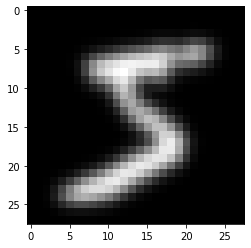

In [ ]:
# 重新載入資料
# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 首次處理針對 X_train, X_test
X_train_gaussian, X_test_gaussian = [], []
# from skimage.filters import thresholding# .threshold_otsu
from skimage.filters import sobel, gaussian
from tqdm import tqdm

for i in tqdm(range(X_train.shape[0])):
    img = gaussian(image = X_train[i].reshape(28, 28))    
    X_train_gaussian.append(img)

for i in tqdm(range(X_test.shape[0])):
    img = gaussian(image = X_test[i].reshape(28, 28))    
    X_test_gaussian.append(img)  

# 數據二次處理
X_train, X_test = np.array(X_train_gaussian), np.array(X_test_gaussian)
print(X_train.shape, X_test.shape)
# 顯示
plt.imshow(X_train[0], cmap='gray')

In [ ]:
print(X_train[0].min(), X_train[0].max())

0.0 0.9150764761590371


In [ ]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=128, input_dim=784, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

x_Train_norm = X_train_2D # /255.0
x_Test_norm = X_test_2D   # /255.0

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, 
                          validation_split=0.2, epochs=10, 
                          batch_size=800, verbose=2)  

Epoch 1/10
60/60 - 3s - loss: 1.1079 - accuracy: 0.7545 - val_loss: 0.4614 - val_accuracy: 0.8841 - 3s/epoch - 54ms/step
Epoch 2/10
60/60 - 1s - loss: 0.4052 - accuracy: 0.8913 - val_loss: 0.3260 - val_accuracy: 0.9083 - 1s/epoch - 20ms/step
Epoch 3/10
60/60 - 1s - loss: 0.3237 - accuracy: 0.9096 - val_loss: 0.2809 - val_accuracy: 0.9205 - 1s/epoch - 24ms/step
Epoch 4/10
60/60 - 1s - loss: 0.2843 - accuracy: 0.9191 - val_loss: 0.2517 - val_accuracy: 0.9277 - 1s/epoch - 17ms/step
Epoch 5/10
60/60 - 1s - loss: 0.2538 - accuracy: 0.9278 - val_loss: 0.2274 - val_accuracy: 0.9368 - 1s/epoch - 22ms/step
Epoch 6/10
60/60 - 1s - loss: 0.2283 - accuracy: 0.9356 - val_loss: 0.2096 - val_accuracy: 0.9396 - 1s/epoch - 19ms/step
Epoch 7/10
60/60 - 1s - loss: 0.2090 - accuracy: 0.9405 - val_loss: 0.1938 - val_accuracy: 0.9457 - 673ms/epoch - 11ms/step
Epoch 8/10
60/60 - 1s - loss: 0.1933 - accuracy: 0.9446 - val_loss: 0.1848 - val_accuracy: 0.9496 - 674ms/epoch - 11ms/step
Epoch 9/10
60/60 - 1s - lo

In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


313/313 [==============================] - 1s 2ms/step - loss: 0.1609 - accuracy: 0.9536

	[Info] Accuracy of testing data = 95.4%


In [ ]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))  


1875/1875 [==============================] - 4s 2ms/step - loss: 0.1628 - accuracy: 0.9531

	[Info] Accuracy of training data = 95.3%


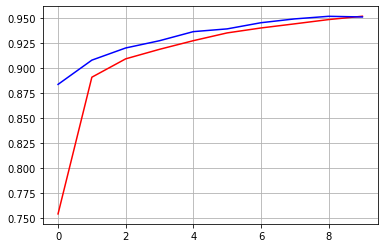

In [ ]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.grid()
plt.show()

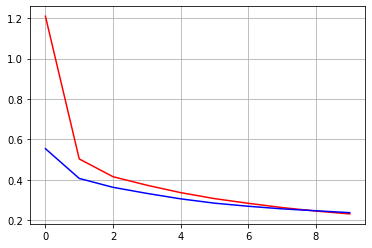

In [ ]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.grid()
plt.show()